# S1: Introducción a R, tipos de objetos

Rodrigo García Manzanas: <rodrigo.manzanas@unican.es>

*Depto. de Matemática Aplicada y Ciencias de la Computación*

## ¿Qué es R?

* En 1976, John Chambers, Rick Becker y Allan Wilks desarrollaron *S* como un conjunto de macros Fortran, que se convirtieron en el entorno de análisis estadístico de Bell Labs.
* En 1988, se reescribió completamente S (S3) en código C. Diez años más tarde, en 1998, se lanzó S4, que contenía un conjunto de características orientadas a objetos más avanzadas que las de S3. S4 (y su versión comercial S-Plus) siguen estando vigentes en la actualidad.
* En pocas palabras, R es un dialecto libre del lenguaje S, desarrollado en 1993 por Robert Gentleman y Ross Ihaka del departamento de Estadística de la Universidad de Auckland.
* Con varios millones de usuarios a nivel mundial, R se ha convertido rápidamente en uno de los lenguajes de programación líderes en estadística y ciencia de datos. Cada año, el número de usuarios de R crece en un 40%, y cada vez más organizaciones lo están usando para sus actividades cotidianas. Sus características básicas son:
  + software libre de código abierto -> desarrolladores de todo el mundo contribuyen con paquetes que permiten realizar análisis cada vez más específicos y sofisticados. No hay limitaciones.   
  + está en constante evolución y se dispone de una amplia documentación. Hay mucha información disponible en foros como *Stackoverflow*.
  + gran capacidad de gráficos para visualizar información compleja de una forma sencilla. 
  + muy flexible, puede trabajar con datos procedentes de todo tipo de archivos: .txt, .csv, JSON, etc.
* Existen múltiples guías para el aprendizaje y uso de R. Entre las más populares figuran:
  + "Introduccion a R": http://cran.r-project.org/doc/contrib/R-intro-1.1.0-espanol.1.pdf
  + "R para principiantes": https://cran.r-project.org/doc/contrib/rdebuts_es.pdf
  + "The R book": https://onlinelibrary.wiley.com/doi/book/10.1002/9781118448908

## Primeros pasos con R

Instalación:
 + Desde la paǵina de CRAN (Comprehensive R Archive Network): https://cran.r-project.org/mirrors.html. CRAN es el repositorio oficial de R (y la mayoría de sus paquetes), el cual es coordinado por la "R foundation" y mantenido por la comunidad de usuarios de R en todo el mundo.
   + En Ubuntu y otras distribuciones Linux suele bastar con ejecutar `sudo apt-get install r-base`
   + Suele publicarse una nueva versión de R cada seis meses. Es conveniente utilizar siempre la última versión.
* R es un lenguaje de programación orientado a objetos, muy similar en sintaxis a C y C++. Todo en R son **objetos**: un valor numérico es un objeto, un vector es un objeto, una función es un objeto, una base de datos es un objeto, un gráfico es un objeto... Entre otras cosas, esto significa que una misma función puede hacer cosas distintas según la clase del objeto que recibe como argumento, pudiendo incluso no hacer nada (o producir un error) si se le pasan argumentos de una clase inadecuada.
* El nombre de un objeto de R puede ser cualquier cadena alfanumérica formada por letras (R distingue entre mayúsculas y minúsculas), dígitos del 0 al 9 (nunca en primera posición del nombre) y los signos "." y "\_". Por ejemplo, *Var123* o *Var.123* son nombres válidos.

### R desde terminal

* Para abrir una sesión de R, simplemente ejecuta la orden `R` desde la terminal. Algunos comandos básicos son los siguientes:

`# esto es un comentario
getwd()  # muestra el directorio de trabajo actual
setwd(".../panorama/R")  # especifica un nuevo directorio de trabajo
list.files()  # lista el contenido del directorio de trabajo 
ls()  # lista los objetos guardados en memoria en la sesión de trabajo actual
quit()  # cierra la sesión actual`

### R en Jupyter

* Para poder usar R desde Jupyter necesitamos instalar [IRKernel](https://irkernel.github.io/) (kernel de R para Jupyter), que permite incorporar celdas de código en lenguaje R. Para ello, hay que seguir las siguientes instrucciones (https://irkernel.github.io/installation/#binary-panel):

 1) Se instalan desde la consola de R los paquetes necesarios, incluido IRKernel:
 
   `install.packages(c('repr', 'IRdisplay', 'evaluate', 'crayon', 'pbdZMQ', 'devtools', 'uuid', 'digest'))`   
   `devtools::install_github('IRkernel/IRkernel')`
   
 2) A continuación debe hacerse visible el kernel desde Jupyter. Para ello, debemos ejecutar desde R:
 
   `IRkernel::installspec()`   
   
Ahora se activará dentro del menú *Kernel* de Jupyter una nueva opción `R` para utilizar celdas con ese lenguaje.

En ocasiones puede ocurrir que la instalación de IRKernel no se propague correctamente de forma que no podamos seleccionar el kernel de R desde el notebook. En ese caso, deberíamos en primer lugar evisar el listado de kernels  disponibles (desde la terminal):

   `jupyter kernelspec list`
   
A continuación, en caso de que el kernel de R esté disponible, forzar su instalación:

   `jupyter kernelspec install /path/jupyter/kernels/ir`

En dicho momento debería aparecer como seleccionable desde el notebook.

### RStudio
* RStudio es un IDE (*Integrated Development Environment*, o Entorno de Desarrollo Integrado) de código abierto que permite interactuar con R de manera muy simple. Por decirlo de una manera gráfica, R será nuestro motor para el análisis de datos y Rstudio la carrocería que nos va a permitir manejar cómodamente toda la potencia del motor.
* Entre otras ventajas, Rstudio es multiplataforma (existen versiones para Windows, Linux y Mac) permite autocompletar código (tecla tabulador), incluye un sistema de menús de ayuda muy completo, cuenta con un potente sistema para la gestión, descarga y construcción de librerías, dispone de un depurador de código que detecta posibles errores de sintaxis...
* Instalación: 
http://www.rstudio.com
* Por defecto, RStudio tiene cuatro paneles principales (la interfaz puede modificarse en *Tools → Options → Panel Layout*). 
   + El panel inferior izquierdo es una consola de R. En ella se puede escribir y ejecutar código. 
   + El panel superior izquierdo es un editor de código. Los ficheros que se abran y se editen irán apareciendo en distintas pestañas.
   + Los paneles de la derecha son menos importantes. 
      + El superior contiene un listado de las variables almacenadas en memoria y un histórico del código ejecutado (como principales funcionalidades).
      + De entre todas las pestañas que aparecen en el inferior, las más usadas generalmente son:
        + Files: da acceso al sistema de ficheros del disco duro.
        + Plots: aloja los gráficos que cree R.
        + Help: muestra la página de ayuda de las funciones cuando la solicite el usuario.             
* Permite la creación de proyectos e integra funcionalidades git.

## Estructuras de datos en R

* Como ya hemos comentado, las entidades que R crea y manipula se denominan **objetos**.   
  + Los atributos de un objeto suministran información específica sobre el propio objeto.
  + Un objeto siempre lleva como atributo la longitud y la clase
    + La función `class()` devuelve la clase del objeto.  
    + La función `length()` devuelve la longitud del objeto.  
    + La función `str()` da informacion general sobre la estructura del objeto.  

* R dispone las siguientes estructuras de datos (clases), que se ilustran en este [esquema]:
  + vector
  + matrix
  + array
  + list
  + data.frame
  + factor
  
* Estas estructuras pueden estar formadas por un único o varios tipos (clases atómicas).
  + Enteros  - **integer** (e.g. 2L, as.integer(3))
  + Numérico - **numeric/double** (números reales) (e.g. 2, 2.0, pi, Inf) 
  + Complejo - **complex** (e.g. 1 + 0i, 1 + 4i)   
  + Lógicos - **logical** (TRUE, FALSE)     
  + Caracteres - **character** (e.g, "Hola", "mundo")    

### Operadores elementales

In [ ]:
# operadores aritméticos y/o matemáticos

# suma, resta
5+8
5-8
# multiplicación, división
6*3
6/3
# potenciación
2**3
2^3
# división entera (en lugar de devolver el cociente, nos devuelve el residuo)
5%%2  
4%%2
# raiz cuadrada
sqrt(4)
# exponencial
exp(1)
# logaritmo neperiano
log(1)
# seno
sin(pi/2)
# coseno
cos(0)
# tangente
tan(pi)
# números complejos
(1 + 2i) * (2 + 1i)

In [ ]:
# operadores lógicos
5 > 4
4 == 3
FALSE & TRUE
FALSE | TRUE
!FALSE

In [ ]:
# concatenación cadenas de caracteres
paste("Hoy","es","lunes", sep = ".")
paste("Hoy","es","lunes")

In [ ]:
# operador asignación
objeto1 <- 3
objeto2 = 6
assign("objeto3", 7)

print(objeto1)
print(objeto2)
print(objeto3)

In [ ]:
# tipo (interno de R) de un objeto 
a <- "Hola"
b <- 2
c <- 2L
d <- 2 + 1i
e <- FALSE 

typeof(a)
typeof(b)
typeof(c)
typeof(d)
typeof(e)

### Vectores 
La estructura de datos más simple en R es el vector, que es una colección unidimensional ordenada de elementos. 

Tipos de vectores:
+ numérico
  + entero
  + real
  + complejo
+ carácter 
+ lógico

Un número, por ejemplo, sería un vector numérico de longitud uno.

Las funciones más frecuentemente utilizadas para el manejo de vectores son `length()`, `rev()`, `sort()`

In [ ]:
# creación de un vector
x <- c(1.1, 2.2, 3.3, 4.4, 5.5)
print(x)
class(x)

In [ ]:
# creación de un vector de ceros
x <- numeric(length = 5)
print(x)
class(x)

y <- rep(0, length = 5)
print(y)
class(y)

In [ ]:
# en el caso de vectores, los operadores aritméticos y/o matemáticos operan a nivel de elemento
x <- c(1,2,3,4,5)
print(1 / x) # división
print(x + 1) # suma
print(2 * x) # multiplicación
print(x^2) # potenciación
exp(x) # exponencial
log(x) # logaritmo neperiano
sin(x) # seno

In [ ]:
# max, min, sum, prod
x <- c(1,2,3,4,5)
print(max(x))
print(min(x))
print(sum(x))
print(prod(x))

In [ ]:
# operaciones aritméticas entre dos vectores:  
# IMPORTANTE: el resultado será otro vector con longitud = longitud del vector más largo
# el vector más corto será reciclado
x <- c(1,2,3,4,5)
y <- c(1,2,3)

print(x + y)
print(x - y)
print(x*y)
print(x^y)

In [ ]:
# producto escalar entre dos vectores:
# si los dos vectores son de la misma longitud, el operador `%*%` devuelve el producto escalar como un objeto de clase `matrix`
x1 <- c(1,2,3)
x2 <- c(4,5,6)
prod.escalar <- x1 %*% x2

print(prod.escalar)
class(prod.escalar)  # clase 'matrix'
typeof(prod.escalar)  # tipo `double'

In [ ]:
# ordenar un vector
va = runif(10)  # creo un vector de 10 números aleatorios (uniformemente distribuídos entre el 0 y el 1)
vao = sort(va)  # vector ordenado de menor a mayor
#vao = sort(va, decreasing = TRUE)
plot(vao, xlab = "orden", ylab = "número aleatorio")  # dibujo el vector

In [ ]:
# secuencias
seq1 <- 1:10 
seq2 <- seq(0, 10, by = 2)
seq3 <- seq(10, 0, by = -2) 

print(seq1)
print(seq2)
print(seq3)

**Ejercicio**

Crea con las funciones `rep()` y `seq()` el siguiente vector: 11, 11, 11, 1, 2, 3, 4, 5, 7, 9, 11

In [ ]:
# solución


In [ ]:
# vector lógico
logi <- c(FALSE, TRUE)
typeof(logi)

# vector de caracteres (o strings)
char <- c("Hola","que","tal")
typeof(char)

**¡Un vector sólamente puede contener un tipo atómico!** Cuando se combinan dos tipos atómicos en un único vector, R convertirá automáticamente uno de ellos al tipo del otro.

In [ ]:
c(2, "Hola")
typeof(c(2, "Hola"))

c(FALSE, "Hola")
typeof(c(FALSE, "Hola"))

c(FALSE, 2)
typeof(c(FALSE, 2))

Se puede comprobar de qué tipo es un vector dado con las funciones `is.character()`, `is.numeric()`, `is.integer()`... Se puede convertir el tipo de un vector a otro tipo con las funciones `as.character()`, `as.integer()`...

In [ ]:
r <- c(1.1,2.2,3.3)

#print(as.integer(r))
#print(as.character(r))

#is.character(as.character(r))

**Ejercicio**  

Crea un vector 'v' que contenga una secuencia de enteros desde el 3 hasta el 10. Convierte 'v' a un vector de tipo caracter y comprueba de qué tipo es el vector resultante

In [ ]:
# solución


In [ ]:
# selección de subvectores (mediante corchetes `[]`)
x <- 10:15

print(x[1:2]) # selecciono los dos primeros elementos de x
print(x[c(1, length(x))]) # selecciono el primer y último elemento de x
print(x[-c(3, 5)]) # excluyo el tercer y quinto elementos

In [ ]:
# selección de subvectores (mediante índices lógicos)
x <- 1:10
print(x)

# construcción de un vector lógico que indica qué elementos de x son mayores que 5 
y <- x > 5

# construcción de un vector lógico que indica qué elementos de x son par
z <- x %% 2 == 0


**Ejercicio** 

Crea un vector de caracteres con los nombres de 5 personas. 
Extrae a continuación un subvector con las personas 2 y 4 y ordena sus nombres en orden alfabético inverso.

In [ ]:
# solución
nom = c("", "", "", "", "")


Los *missing values* se indican mediante `NA` (Not Available) o `NaN` (Not A Number). `NaN` caracteriza un valor que sale de una indeterminación matemática, por ejemplo 0/0. Los `NA` se pueden detectar con la función `is.na()`

In [ ]:
# elimina los missing values del siguiente valor
x <- c(-1, -2, 1, 2, NA, 4, NA, log(pi), NA, 5, -6, -9, NA, NA)
print(x)

# solución

In [ ]:
# crea un nuevo vector que sólo contega los valores positivos de x (sin missing values)
x <- c(-5,-4,-3,-2,-1, NA, 1, 2, NA, 4,5)

# solución

### Matrices

Las matrices son generalizaciones bidimensionales (fila-columna) de los vectores:
* Se pueden crear con la función `matrix()`
* Llevan por defecto el atributo `dim`, al cual se puede acceder con la función `attributes()`
* Se pueden añadir otros atributos: `names`, `row.names`, `col.names`... 

Funciones utilizadas frecuentemente para el manejo de matrices:
`t()`, `diag()`, `det()`

**Ejercicio**

Utiliza las funciones `t()`, `diag()` y `det()` con la matriz que se proporciona a continuación (objeto `mat`). ¿Qué hace cada una de estas funciones?

In [ ]:
mat <- matrix(1:9, ncol = 3, byrow = TRUE)
print(mat)
dim(mat)
class(mat)

# solución


In [ ]:
# crear una matriz 2x3 de NAs 
m1 <- matrix(NA, nrow = 2, ncol = 3)

print(m1)
dim(m1)

In [ ]:
# crear una matriz a partir de un vector
m2 <- 1:10
dim(m2) <- c(2,5) # establezco dimensiones: 2 filas, 5 columnas
class(m2)

In [ ]:
# crear una matriz por concatenación de vectores de igual longitud
x <- 1:3
y <- 10:12

# por columnas: `cbind()`
# z1 <- 


# por filas: `rbind()`
# z2 <- 

In [ ]:
# asignación de etiquetas a las filas y columnas de una matriz
rownames(z2) = c("row1", "row2")
colnames(z2) = c("col1", "col2", "col3")
print(z2)

In [ ]:
# suma elemento a elemento 
M <- matrix(1:4, nrow = 2, byrow = TRUE)
print(M)
print(M+2)

Si a una matriz se le suma un vector cuya longitud sea igual al número de filas de la matriz, se obtiene como resultado una nueva matriz cuyas columnas son la suma de las columnas de la matriz original más dicho vector.

In [ ]:
v <- 3:4
print(M+v)

# ¿qué se obtendrá como resultado de la siguiente operación?
print(M + 3:5)

La suma o resta de matrices de la misma dimensión se realiza con los operadores `+` y `-`.

In [ ]:
print(M+M)
print(M-M)

El producto de matrices (siempre que sean compatibles) se realiza con el símbolo `%*%`. El símbolo `*` denota el producto elemento a elemento.

In [ ]:
print(M%*%M)  # producto matricial
print(M*M)    # producto elemento a elemento

In [ ]:
# selección de submatrices (mediante índices)
m <- matrix(1:9, nrow = 3, ncol = 3, byrow = TRUE)
print(m)

m[2, 3] # fila 2, columna 3
m[2, ] # fila 2 completa
m[ , 3]  # columna 3 completa
m[1, 2:3] # segundo y tercer elementos de la primera fila

**Ejercicio**

* Crea un vector con 12 enteros cualesquiera (utiliza la función `sample`)
* Convierte el vector a una matriz de tamaño 4x3
* Llama a las columnas de dicha matriz `x`, `y`, `z` y a las filas `a`, `b`, `c`, `d`.  
* Extrae la submatriz 3x3 formada por las tres últimas filas (`b`, `c`, `d`)

In [ ]:
# solución


In [ ]:
# haz nulos los elementos par de la siguiente matriz
m <- matrix(1:9, nrow = 3, ncol = 3, byrow = TRUE)

# solución

### Arrays
Un array es una colección de datos (por ejemplo numéricos) indexados. En otras palabras, los arrays son generalizaciones multi-dimensionales (en 3 o más dimensiones) de los vectores.

In [ ]:
# creación de un array

# mediante `array`
a <- array(1:24, dim = c(2,3,4))
print(a)
#class(a)
#print(dim(a))

# mediante `dim`
x <- 1:24
dim(x) <- c(2,3,4) 
#print(x)
#class(x)
print(dim(x))

In [ ]:
# selección de subarrays (mediante índices)
print(x[1,1,1]) # "aplano" las tres dimensiones
print(x[,,1]  ) # "aplano" la tercera dimensión
print(x[,2,1])  # "aplano" la segunda y tercera dimensiones

### Factores
Un factor es un vector utilizado para especificar una clasificación discreta de los elementos de otro vector de igual longitud. Un factor lleva dos atributos: `levels` y `class`, a los cuales se puede acceder mediante `levels()` y `class()`

In [ ]:
# creación de un factor
ciudades <- c("San","Tor","Ovi","Ovi","San","Ovi","San","Tor","Ovi")
print(ciudades)
class(ciudades)

ciudadesf <- as.factor(ciudades)  # creo un factor a partir del vector dado
print(ciudadesf)
class(ciudadesf)

In [ ]:
# atributos del factor creado
attributes(ciudadesf)

In [ ]:
# acceso a los atributos 
print(levels(ciudadesf))
length(levels(ciudadesf))  # ¿cuántas ciudades distintas hay en mi vector inicial? 

In [ ]:
# aplica las funciones 'table' y 'plot' al objeto 'ciudadesf'


**Ejercicio**

* Crea un vector de 1000 elementos que contenga únicamente números enteros entre el 0 y el 9 (puedes utilizar la función `sample`).  
* Convierte ese vector a factor.
* Accede a los distintos niveles.  
* Haz una tabla de frequencias y dibuja el histograma asociado.

   [1] 9 2 7 7 1 2 0 0 1 2 2 9 2 8 4 8 4 4 6 7 4 5 9 9 9 9 4 1 9 5 3 5 9 8 0 0 0
  [38] 8 1 7 3 8 1 8 9 3 7 4 5 6 4 0 7 8 5 1 1 0 5 0 2 2 7 7 4 9 5 7 7 9 2 9 4 8
  [75] 2 2 5 1 8 9 7 5 5 2 6 5 7 7 3 5 2 8 4 6 4 6 4 3 5 1 9 5 9 2 8 7 2 2 8 2 5
 [112] 4 2 0 6 7 2 2 6 5 4 5 0 9 0 1 8 3 8 8 2 2 4 5 2 6 7 6 9 2 3 7 3 8 2 4 9 8
 [149] 9 5 3 1 0 1 4 9 1 5 5 9 4 5 0 2 3 2 4 6 9 2 6 4 3 0 7 2 6 1 3 6 6 3 7 4 1
 [186] 0 4 7 1 4 1 6 5 7 8 1 1 5 3 1 1 1 6 4 7 9 8 3 0 2 7 7 2 6 4 7 5 8 6 4 1 8
 [223] 4 9 7 4 3 6 2 1 3 1 7 0 0 6 4 3 5 7 3 4 0 8 6 8 9 9 1 7 7 6 3 1 1 6 0 2 5
 [260] 2 3 0 0 9 0 7 5 2 3 5 0 1 8 4 2 4 5 4 3 9 3 8 7 1 7 4 8 9 2 6 3 1 1 8 6 6
 [297] 4 4 2 0 6 5 8 0 9 7 6 7 8 0 7 5 2 9 0 8 4 3 5 1 6 2 3 9 3 2 0 2 7 1 1 7 2
 [334] 9 3 6 0 9 7 5 3 6 7 6 8 1 4 0 1 8 4 6 9 1 9 4 8 2 4 3 0 4 4 6 7 4 7 5 3 5
 [371] 9 9 2 0 7 1 2 7 9 0 7 5 9 6 7 6 5 1 4 7 1 4 3 9 9 7 8 4 6 9 7 9 8 6 0 2 3
 [408] 3 8 5 1 8 2 4 6 3 2 6 3 1 7 0 5 0 1 2 7 9 4 2 8 6 3 0 2 8 5 5 9 2 6 0 7 6
 [445] 8 7 2 5 2 6 0 8 8 5 8

v.factor
  0   1   2   3   4   5   6   7   8   9 
 82 101 115  97 100 110  85 100 103 107 

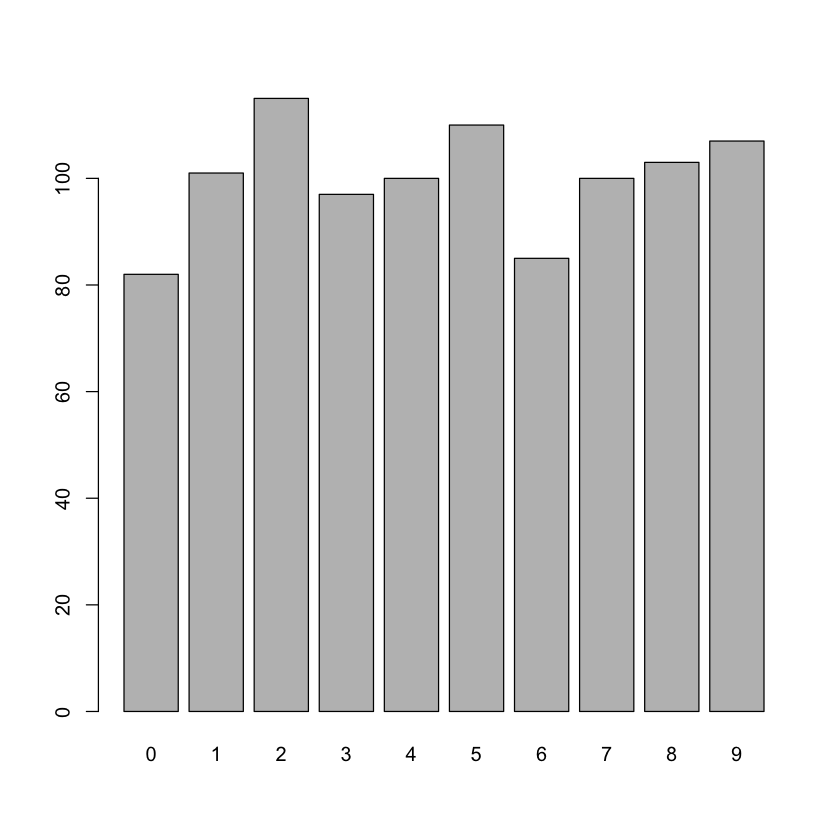

In [7]:
# solución
v = sample(0:9, 1000, replace=TRUE)
v.factor = as.factor(v)
print(v.factor)
table(v.factor)
par(bg = 'white')
plot(v.factor)

### Listas
Una lista es una colección ordenada de objetos, que pueden ser de diferentes tipos (por ejemplo una combinación de vectores, matrices, factores, otras listas, data.frames, etc.). 

In [8]:
# crear una lista
list1 <- list("Pedro", "García", 3, c(4,7,9), matrix(1, nrow = 2, ncol = 3))

In [9]:
# se le puede dar nombres a los elementos de una lista
list2 <- list(nombre = "Pedro", apellido = "García", 
              no.hijos = 3, edad.hijos = c(4,7,9))

In [10]:
# selección de sublistas
list2[[1]]  
list2[[4]]  
list2[[4]][1]  
list2$nombre  
list2$no.hijos 

[1] "Pedro"

[1] 4 7 9

[1] 4

[1] "Pedro"

[1] 3

### Data frames
Los data frames son estructuras muy versátiles que se usan para guardar tablas de datos (creadas o importadas). Un data frame lleva por defecto los atributos `names`, `row.names`, `class`

In [27]:
# creación de un data frame
edad <- c(22, 34, 29, 25, 30, 33, 31, 27, 25, 25)  # edad estudiantes
tiempo1 <- c(10.36, 14.21, 13.81, 11.89, 10.99, 12.03, 12.48, 13.37, 12.29, 11.92)  # primera carrera de 100 m.
tiempo2 <- c(11.38, 15.20, 14.91, 12.90, 12.03, 12.58, 13.00, 13.01, 14.54, 15.27)  # segunda carrera de 100 m.
sexo <- factor(c("M","H","H","M","M","H","M","M","H","H"))

df <- data.frame(edad, tiempo1, tiempo2, sexo) # data frame, columnas
print(df)

   edad tiempo1 tiempo2 sexo
1    22   10.36   11.38    M
2    34   14.21   15.20    H
3    29   13.81   14.91    H
4    25   11.89   12.90    M
5    30   10.99   12.03    M
6    33   12.03   12.58    H
7    31   12.48   13.00    M
8    27   13.37   13.01    M
9    25   12.29   14.54    H
10   25   11.92   15.27    H


In [28]:
# resumen del data.frame
str(df)    

'data.frame':	10 obs. of  4 variables:
 $ edad   : num  22 34 29 25 30 33 31 27 25 25
 $ tiempo1: num  10.4 14.2 13.8 11.9 11 ...
 $ tiempo2: num  11.4 15.2 14.9 12.9 12 ...
 $ sexo   : Factor w/ 2 levels "H","M": 2 1 1 2 2 1 2 2 1 1


Se puede acceder a las columnas de un data frame por su nombre y operar con ellas fácilmente.

In [29]:
df$tiempo.total <- df$tiempo1 + df$tiempo2
print(df)

   edad tiempo1 tiempo2 sexo tiempo.total
1    22   10.36   11.38    M        21.74
2    34   14.21   15.20    H        29.41
3    29   13.81   14.91    H        28.72
4    25   11.89   12.90    M        24.79
5    30   10.99   12.03    M        23.02
6    33   12.03   12.58    H        24.61
7    31   12.48   13.00    M        25.48
8    27   13.37   13.01    M        26.38
9    25   12.29   14.54    H        26.83
10   25   11.92   15.27    H        27.19


Existen funciones de R que operan directamente sobre data frames. Estas funciones reconocen automáticamente los nombres de las columnas, los factores (si los hay), etc.

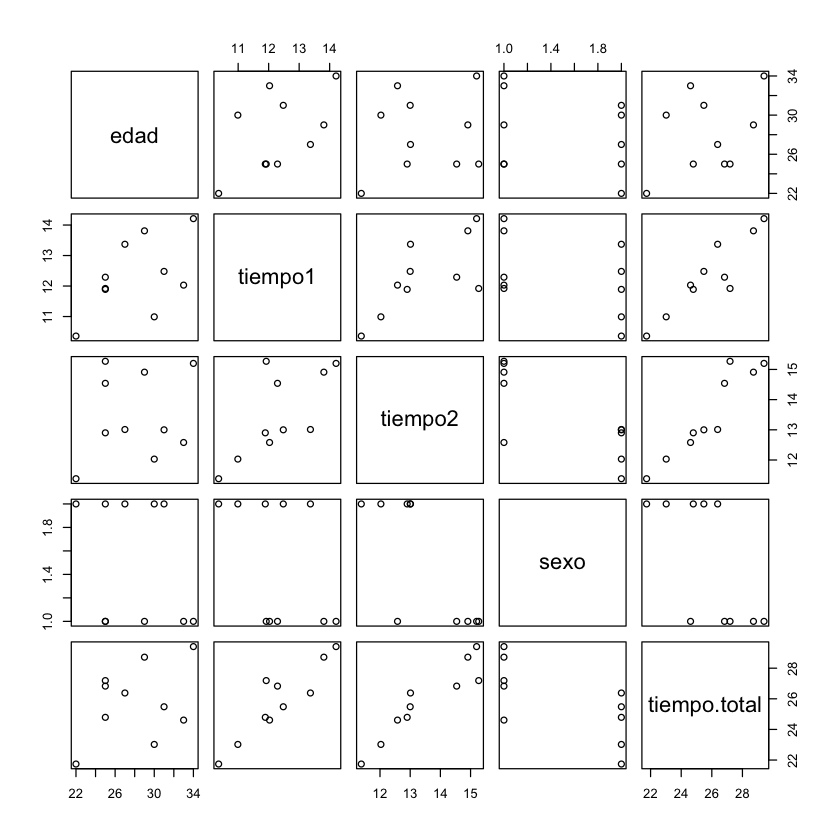

In [30]:
par(bg ='white')
plot(df)  # scatter plot que enfrenta todas las variables entre sí

[1] M H H M M H M M H H
Levels: H M

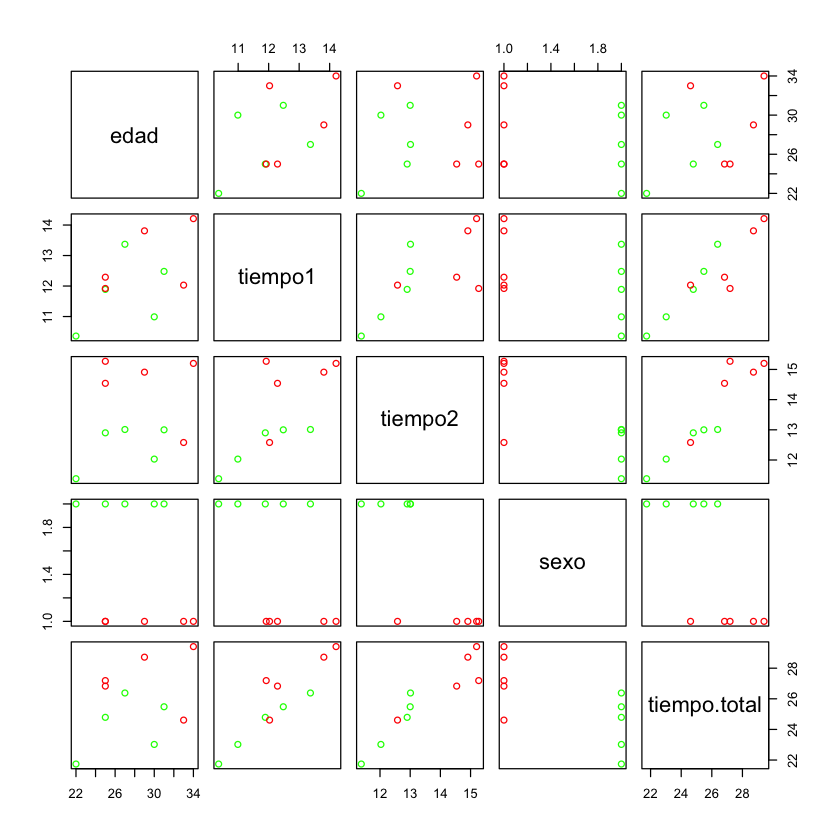

In [31]:
par(bg ='white')
plot(df, col = c("red","green")[df$sexo]) # rojo = mujer, verde = hombre
df$sexo

**Ejercicio**

* Añade una nueva columna al data frame con la media de los tiempos empleados en las dos carreras. 
* Añade una nueva columna que indique si los estudiantes han aprobado el test: Tiempo medio < 13.  
* Dibuja la edad vs. el tiempo medio.

In [32]:
# solución
df$tiempo.medio <- (df$tiempo1 + df$tiempo2)/2
df

edad,tiempo1,tiempo2,sexo,tiempo.total,tiempo.medio
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
22,10.36,11.38,M,21.74,10.870
34,14.21,15.20,H,29.41,14.705
29,13.81,14.91,H,28.72,14.360
25,11.89,12.90,M,24.79,12.395
30,10.99,12.03,M,23.02,11.510
33,12.03,12.58,H,24.61,12.305
31,12.48,13.00,M,25.48,12.740
27,13.37,13.01,M,26.38,13.190
25,12.29,14.54,H,26.83,13.415


In [37]:
df$aprobado <- df$tiempo.medio < 13
df

edad,tiempo1,tiempo2,sexo,tiempo.total,tiempo.medio,aprobado
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<lgl>
22,10.36,11.38,M,21.74,10.870,TRUE
34,14.21,15.20,H,29.41,14.705,FALSE
29,13.81,14.91,H,28.72,14.360,FALSE
25,11.89,12.90,M,24.79,12.395,TRUE
30,10.99,12.03,M,23.02,11.510,TRUE
33,12.03,12.58,H,24.61,12.305,TRUE
31,12.48,13.00,M,25.48,12.740,TRUE
27,13.37,13.01,M,26.38,13.190,FALSE
25,12.29,14.54,H,26.83,13.415,FALSE


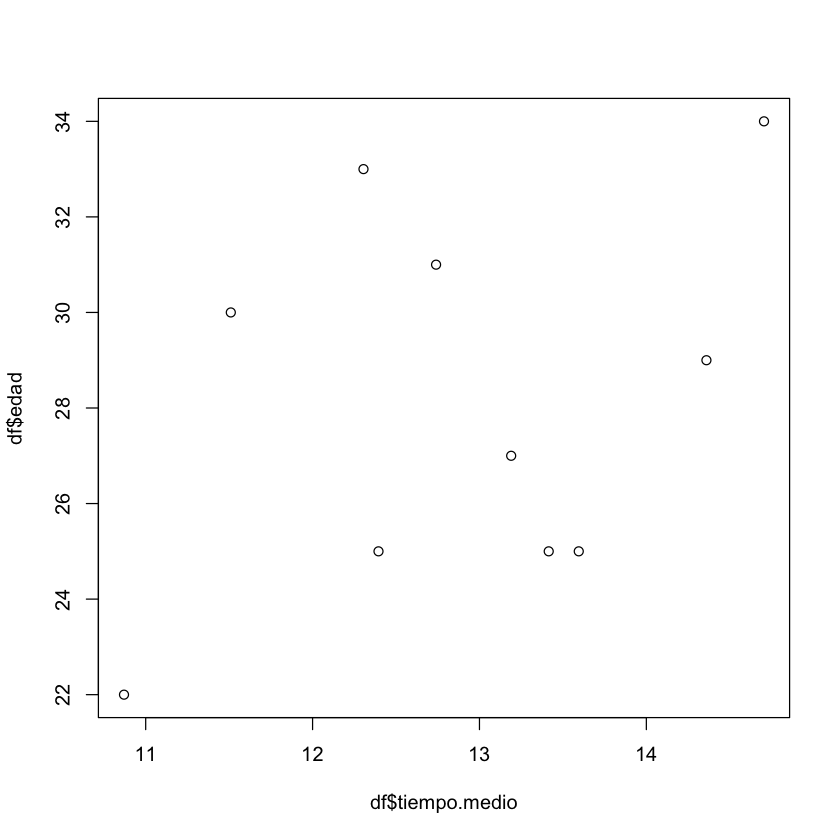

In [38]:
par(bg = 'white')
plot(df$tiempo.medio, df$edad)

Las bases de datos o datasets (por ejemplo en formato excel o csv) se importan en R como data frames para análisis posteriores. R incluye por defecto una serie de datasets interesantes, por ejemplo `swiss` (datos sobre fertilidad y diversos factores socio-econónicos en 47 provincias suizas).

In [39]:
data(swiss)  # cargo en memoria el dataset swiss
?swiss  # obtengo información sobre el dataset
str(swiss)

'data.frame':	47 obs. of  6 variables:
 $ Fertility       : num  80.2 83.1 92.5 85.8 76.9 76.1 83.8 92.4 82.4 82.9 ...
 $ Agriculture     : num  17 45.1 39.7 36.5 43.5 35.3 70.2 67.8 53.3 45.2 ...
 $ Examination     : int  15 6 5 12 17 9 16 14 12 16 ...
 $ Education       : int  12 9 5 7 15 7 7 8 7 13 ...
 $ Catholic        : num  9.96 84.84 93.4 33.77 5.16 ...
 $ Infant.Mortality: num  22.2 22.2 20.2 20.3 20.6 26.6 23.6 24.9 21 24.4 ...


swiss                 package:datasets                 R Documentation

_S_w_i_s_s _F_e_r_t_i_l_i_t_y _a_n_d _S_o_c_i_o_e_c_o_n_o_m_i_c _I_n_d_i_c_a_t_o_r_s (_1_8_8_8) _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Standardized fertility measure and socioeconomic indicators for
     each of 47 French-speaking provinces of Switzerland at about 1888.

_U_s_a_g_e:

     swiss
     
_F_o_r_m_a_t:

     A data frame with 47 observations on 6 variables, _each_ of which
     is in percent, i.e., in [0, 100].

       [,1]  'Fertility'         Ig,                                             
                                 'common standardized fertility measure'         
       [,2]  'Agriculture'       % of males involved in agriculture              
                                 as occupation                                   
       [,3]  'Examination'       % draftees receiving highest mark               
                   

**Ejercicio**

* Convierte la variable `catholic` en una variable categórica (por ejemplo de tipo lógico con la condicion > 55%). A continuación conviértela a factor y haz una tabla de frequencias: ¿Como se divide el país?
* Crea un nuevo data frame (`swiss2`) que sólo contenga las columnas "Fertility", "Agriculture" e "Infant.Mortality". Dibuja un scatterplot de este nuevo dataset.

In [42]:
# solución
swiss$Catholic <- as.factor(swiss$Catholic > 55)
table(swiss$Catholic)


FALSE  TRUE 
   30    17 

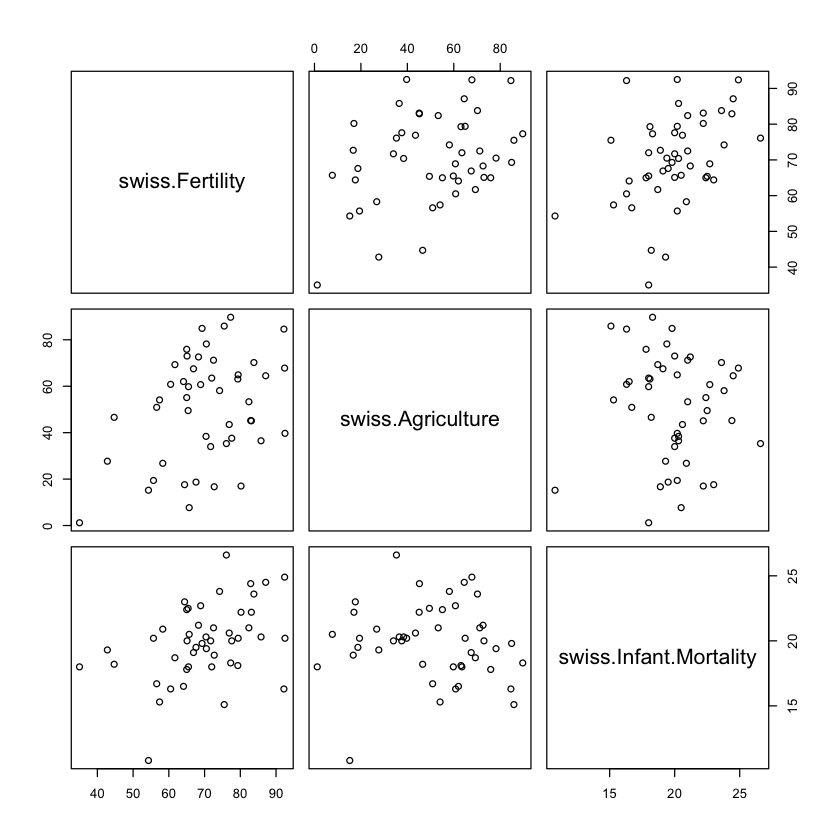

In [46]:
swiss2 <- data.frame(swiss$Fertility, swiss$Agriculture, swiss$Infant.Mortality)
par(bg ='white')
plot(swiss2)

### Funciones
Las funciones permiten realizar operaciones sobre objetos de una manera estructurada. La forma básica de definir una función (por ejemplo, *function.name*) en R es la siguiente:

```{r}
function.name <- function(arg1, arg2, ..., argN) {
# statements
}
```
 
*arg1, ..., argN* son las variables y/o argumentos de entrada que necesita la función. La forma de llamar a la  función sería tal que así:

```{r}
res <- function.name(arg1, arg2, ..., argN)
```
     
*res* es la variable de salida que devuelve la función como resultado de las operaciones llevadas a cabo sobre las variables de entrada.

In [47]:
# es posible definir una función sin ninguna variable de entrada (aunque no tiene mucho sentido)

# función "sin función"
hello <- function() {
 print("Hello world")
}
hello()

[1] "Hello world"


In [48]:
# calcula la suma de dos números
fun.sum <- function(x, y) {
 return(x + y)
}
fun.sum(5, 7)

[1] 12

In [49]:
# calcula el máximo y el mínimo de un vector
max.min <- function(x) {
 return(c(min(x), max(x)))
}

print(max.min(1:100))

[1]   1 100


**Ejercicio**

Construye una función llamada *IMC* que calcule el *Indice de Masa Corporal* a partir del peso (en kg) y la altura (en m) siguiendo la fórmula IMC = peso/altura^2 y aplícala a los siguientes datos:

In [52]:
peso = c(55, 63, 77, 82, 61, 75, 92)
altura = c(1.60, 1.73, 1.71, 1.75, 1.58, 1.72, 1.81)

In [53]:
# solución
IMC <- function(peso, altura) {
    return(peso/altura^2)
}
IMC(peso, altura)

[1] 21.48437 21.04982 26.33289 26.77551 24.43519 25.35154 28.08217

Hay variables de entrada que son obligatorias y otras que son opcionales. Por ejemplo, la función *log* tiene una variable de entrada obligatoria (el número del cual se desea calcular el logaritmo) y otra opcional (si no se especifica lo contrario, se calcula el logaritmo natural, es decir, en base *e*).

In [ ]:
log(exp(1)) # log neperiano
log(exp(1), base = 2)

[1] 1

[1] 1.442695

In [55]:
# la función operate.2num, por ejemplo, admite un argumento de entrada opcional ("operator"), que puede tomar los valores "power" o "divide".
# función para realizar operaciones (elevar al cuadrado o dividir) sobre dos números
operate.2num = function(x, y, operator = NULL) {    
    if (is.null(operator)) {
        return(c(x, y))
    } else if (operator == "power") {
        return(x^y)
    } else if (operator == "divide") {
        return(x/y)
    }    
}
print(operate.2num(10, 2))
print(operate.2num(10, 2, "power"))
print(operate.2num(10, 2, "divide"))

[1] 10  2
[1] 100
[1] 5


**Ejercicio**
 
Modifica la función *operate.2num* para que:
 * Permita también calcular el logaritmo de "x" en base "y"
 * En el caso de la operación "power" sea el mayor de los dos números el que se eleve al menor

In [63]:
# solución
operate.2num = function(x, y, operator = NULL) {    
    if (is.null(operator)) {
        return(c(x, y))
    } else if (operator == "power") {
        if (x > y) {
            return(x^y)
        } else {
            return(y^x)
            }
    } else if (operator == "divide") {
        return(x/y)
    } else if (operator == "log") {
        return(log(x, y))
    }
}

print(operate.2num(2, 10, "power"))
print(operate.2num(10, 2, "power"))

[1] 100


[1] 100


Siempre que esté correctamente documentada, la ayuda de una función en R se puede obtener mediante los comandos `?` y `help()`, y se estructura en varias secciones:
   +  **Description**: breve descripción de lo que hace la función.  
   +  **Usage**: sintaxis de la función.
   +  **Arguments**: explicación de los argumentos de entrada que recibe la función.
   +  **Value**: explicación del objeto que devuelve la función (puede ser un valor, una lista, una matriz, etc.)
   +  **References**: bibliografía relacionada con los métodos implementados en la función.
   +  **See Also**: funciones relacionadas.
   +  **Examples**: esta es sin duda la sección más importante ya que muestra ejemplos efectivos del uso de la función.

In [64]:
?mean()

mean                   package:base                    R Documentation

_A_r_i_t_h_m_e_t_i_c _M_e_a_n

_D_e_s_c_r_i_p_t_i_o_n:

     Generic function for the (trimmed) arithmetic mean.

_U_s_a_g_e:

     mean(x, ...)
     
     ## Default S3 method:
     mean(x, trim = 0, na.rm = FALSE, ...)
     
_A_r_g_u_m_e_n_t_s:

       x: an R object.  Currently there are methods for numeric/logical
          vectors and date, date-time and time interval objects.
          Complex vectors are allowed for 'trim = 0', only.

    trim: the fraction (0 to 0.5) of observations to be trimmed from
          each end of 'x' before the mean is computed.  Values of trim
          outside that range are taken as the nearest endpoint.

   na.rm: a logical evaluating to 'TRUE' or 'FALSE' indicating whether
          'NA' values should be stripped before the computation
          proceeds.

     ...: further arguments passed to or from other methods.

_V_a_l_u_e:

  

Si queremos utilizar una función que no recordamos (o no conocemos), pero de la que sabemos (o sospechamos) que su nombre contiene el término *mean*, podemos utilizar *apropos("mean")*, que nos devuelve un listado de funciones que contienen dicho témino en su nombre.

In [65]:
apropos("mean")

[1] ".colMeans"     ".rowMeans"     "colMeans"      "kmeans"       
 [5] "mean"          "mean.Date"     "mean.POSIXct"  "mean.POSIXlt" 
 [9] "mean.default"  "mean.difftime" "rowMeans"      "weighted.mean"

## Librerías en R

* La instalación básica de R viene equipada con múltiples funciones para análisis estadístico, importación de datos, gráficos, etc. Sin embargo, a menudo necesitaremos llevar a cabo un análisis muy específico para el cual no encontremos las funciones adecuadas. En ese caso, la gran ventaja de R radica en que, en la práctica, casi siempre será posible encontrar un paquete (ó librería) que haya sido ya diseñado para el fin que perseguimos.
* Un paquete es una colección de funciones y/o datos con un propósito concreto (normalmente bastante específico) que se almacenan en una carpeta conforme a una estructura bien definida, fácilmente entendible por R.
* En la web de R se puede consultar la lista de paquetes disponibles (actualmente, más de 21000): https://cran.r-project.org/web/packages/. En la sección Task Views (https://cran.r-project.org/web/views/) se puede consultar una lista de paquetes ordenada según áreas de aplicación.

In [66]:
# podemos ver un listado completo de los paquetes actualmente cargados en memoria con el comando `search()`
search()

[1] ".GlobalEnv"        "jupyter:irkernel"  "package:stats"    
 [4] "package:graphics"  "package:grDevices" "package:utils"    
 [7] "package:datasets"  "package:methods"   "Autoloads"        
[10] "package:base"

Para poder usar un paquete es necesario instalarlo y después cargarlo en memoria (comando `library`).
  
 + Instalación de librerías:
     + CRAN 
     + GitHub (hay que instalar antes el paquete "devtools")
     + Local

In [ ]:
## installing from CRAN ##

# R.matlab package (https://cran.r-project.org/web/packages/R.matlab/index.html)
# R.matlab provides methods for controlling MATLAB via R and sending and retrieving data between R and MATLAB
#install.packages("R.matlab")

# la primera vez que se instale un paquete, R preguntará el país desde dónde se desea descargar
# (es aconsejable hacerlo desde un mirror español) 

# una vez instalado no se necesitará instalarlo más, pero hay que cargarlo en memoria para poder usarlo
library(R.matlab)
existsFunction("writeMat")

Installing package into '/opt/homebrew/lib/R/4.5/site-library'
(as 'lib' is unspecified)



also installing the dependencies 'R.methodsS3', 'R.oo', 'R.utils'


R.matlab v3.7.0 (2022-08-25 21:52:34 UTC) successfully loaded. See ?R.matlab for help.


Attaching package: 'R.matlab'


The following objects are masked from 'package:base':

    getOption, isOpen




[1] TRUE

In [1]:
## installing from GitHub ##

# instalamos primero el paquete devtools: https://cran.r-project.org/web/packages/devtools/index.html
install.packages("devtools")
#library(devtools)

# install_github("HenrikBengtsson/R.matlab")
# library(R.matlab)


The downloaded binary packages are in
	/var/folders/6z/7vmhpff15y38vh6y2x4gbzwc0000gn/T//RtmpUUJ9KJ/downloaded_packages


In [2]:
install.packages("tidyverse")
library(tidyverse)


The downloaded binary packages are in
	/var/folders/6z/7vmhpff15y38vh6y2x4gbzwc0000gn/T//RtmpUUJ9KJ/downloaded_packages


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.1     v stringr   1.5.2
v ggplot2   4.0.0     v tibble    3.3.0
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.1.0     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
## instalación local ##

# tendremos que haber descargado antes el paquete de interés, comprimido en formato .tar.gz
install.packages(".../paquete.tar.gz", type = "source")
#library(paquete)

En ocasiones se hace necesario eliminar de la memoria algún paquete que hemos cargado previamente (por ejemplo, porque deseamos cargar una versión que acabamos de actualizar). Para ello basta con ejecutar el comando *detach*

In [ ]:
detach("package:R.matlab")

Si queremos eliminar del disco duro un paquete que tengamos instalado, basta ejecutar la función *remove.packages*

In [ ]:
# remove.packages("R.matlab")

Para ver un listado de todos los paquetes que tenemos en nuestro ordenador que pueden ser actualizados

In [ ]:
old.packages()

Para actualizar dichos paquetes:

In [ ]:
# update.packages()

Finalmente, podemos querer cargar una función que hayamos creado nosotros mismos o hayamos descargado en local, pero que no sea una librería. Para ello tenemos que usar el comando `source`. El problema de este comando es que **hay que volver a aplicarlo siempre que hagamos un cambio en la funcion que queramos utilizar**.

In [ ]:
source(".../R_S1_Introduccion/show.name.R")  # cargamos la función en memoria
show.name("Pedro")  # ya podemos utilizar la función